<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/4_2_1_Molecular_databases_ChEMBL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ChEMBL** (*Data collection and examples*)

---
Made by:  Raziel Cedillo, Fernanda Saldivar and Karen Pelcastre

Contact: brayanraziel1997@gmail.com, fer.saldivarg@gmail.com

**Last Update:** March 2025




#Content
---

>[ChEMBL (Data collection and examples)](#scrollTo=33KdEHEVFTiO)

>[Content](#scrollTo=veEYRsA8Q0bD)

>[Packages: installation and importation](#scrollTo=hhoitJyAKLfw)

>[Example and structure of a general search.](#scrollTo=n0YEPNiCHviL)

>[Endpoints available through the API](#scrollTo=zOhoSqUfLRQs)

>[Available resources (keywords)](#scrollTo=0s39fOS0Ln14)

>>[Double underscore: __](#scrollTo=0s39fOS0Ln14)

>>[Operator: only](#scrollTo=0s39fOS0Ln14)

>[1. Molecule](#scrollTo=q-LQ5_30QgfK)

>>[1.1. Search by:](#scrollTo=W8ZsNMFxdt1Q)

>>>[1.1.1. Exact name](#scrollTo=gYUZnYJ1dyBm)

>>>>[Molecule visualizations:](#scrollTo=G9NObIu2Yq-S)

>>>[1.1.2. Synonyms](#scrollTo=2ZuXwnV1TCkG)

>>>[1.1.3. ChEMBL ID](#scrollTo=iD3BrXiVUyDZ)

>>>[1.1.4. InchI Key standard](#scrollTo=_dklF7HgWGm3)

>>>[1.1.5. SMILES](#scrollTo=W0k017LCh5uk)

>>>[1.1.6. Similarity, considering](#scrollTo=oSv3vowAhJ_x)

>>>>[1.1.6.1. SMILES](#scrollTo=egbp7p_tD8RP)

>>>>[1.1.6.2. ChEMBL ID](#scrollTo=VgAksbqMAorc)

>>>[1.1.7.Conectivity](#scrollTo=nyUeTFTzCRyi)

>>>[1.1.8.Substructures](#scrollTo=P7_2vAiDGJ9W)

>>[1.2 Filters](#scrollTo=ja3TJgplDEN0)

>>>[1.2.1. Biotherapeutic compounds](#scrollTo=fPjBk-rNLprz)

>>>[1.2.2. MolWt<300](#scrollTo=XLV6sPGkIhJI)

>>>[1.2.3. Nested filters](#scrollTo=6kAJ2gL2lNwX)

>>>[1.2.4. Fullilment of  pharmaceutical interest rules (Lipinski y Veber)](#scrollTo=miGO_HULL1T4)

>[2. Drugs](#scrollTo=qVdjTNIpMBXU)

>>[2.1. Obtaining all of the drugs](#scrollTo=W38NxD_J4YbH)

>>[2.2. Use of filters](#scrollTo=8NGMTmdnet7l)

>>>>[2.2.1. Year of release, synonym and keywords of the synonyms](#scrollTo=WPp1ntyroXQA)

>>>>[2.2.2. Maximum clinical phase, classification ATC and year of approval](#scrollTo=-P5_MHzEod2d)

>>[2.3. Identification of:](#scrollTo=WaXQySqytp4R)

>>>>[2.3.1. Molecules considering diseases](#scrollTo=HuFUZt7MfDmr)

>>>[2.3.2. Action mechanism](#scrollTo=lit8yTGVjDix)

>>>[2.3.3. Pharmaceutical alerts](#scrollTo=TH1eg2etZTuD)

>>>>[2.3.3.1. Type of alert](#scrollTo=7_jJYZEDlEjY)

>[3. Molecular targets](#scrollTo=_onh4YmXllK5)

>>[3.1. Search by](#scrollTo=F5EDDR-fxNuG)

>>>[3.1.1. Gen name](#scrollTo=RypGVQYLluGg)

>>>[3.1.2. Uniprot_id](#scrollTo=-pvV9GormqnD)

>>>[3.1.3. Protein name](#scrollTo=qMcAenf0nJLP)

>[4. Activities](#scrollTo=Q-USQ9abnto0)

>[5. Assays](#scrollTo=KNSLCcfMoYSC)

>>[5.1. Toxicity](#scrollTo=iwvbEqLI0RF4)

>[6. Tissues](#scrollTo=XJjthkPn1QpV)

>>[6.1. Search by](#scrollTo=QyuSHPgp3Imm)

>>>[6.1.1. Uberon id](#scrollTo=F4d0e8vH3Dbq)

>>>[6.1.2. Name of the tissue](#scrollTo=AL-WnJs915Xb)

>>>[6.1.3. BTO ID](#scrollTo=yEH_nMlV2KKT)

>>>[6.1.4. EFO ID](#scrollTo=pMDJiKnd2seS)

>[7. Cells](#scrollTo=dkYCIlg93Pon)

>>[7.1. Search by:](#scrollTo=Pmf6lqNG6KAW)

>>>[7.1.1. Cellosaurus id](#scrollTo=2Bb0RNDP6Hj-)

>>>[7.1.2. Description](#scrollTo=C4jljaZA3qOM)

>[8. Utilities](#scrollTo=JhOYrfGG37jN)

>>[8.1. Convert SMILES to CTAB](#scrollTo=NfaPukH04eId)

>>[8.2. Calculate](#scrollTo=hDEuR5GU8EwT)

>>>[8.2.1. Maximum common substructure (MCS)](#scrollTo=k7Rzh4ku5qdm)

>>>[8.2.2. Molecular descriptors](#scrollTo=N1V0CUJQ6ErR)

>>>[8.2.3. Structural alerts](#scrollTo=SQRuYo626v6c)

>>>[8.2.4. Parent molecule from its SMILES identifier](#scrollTo=HUTbCoNn7YpJ)

>>[8.3. Standarize molecule](#scrollTo=RG3-r8Oa7Ih0)

>[For more information:](#scrollTo=dd0ENP_G3Jo8)



The following packages and chemoinformatic tools will help us access the ChEMBL data:
*   chembl_webresource_client
*   Pandas
*   RDKit


Broadly speaking, to make a ChEMBL search through the API we only need three things: 1) the search module "new_client" 2) the **available resource to be used** and 3) the **key word**, that will allow us to use a filter, you can also aplly extra filters.



# Packages: installation and importation
---


In [ ]:
from IPython.utils import io #Provides the tools to capture and delete outputs.
import tqdm.notebook #Provides an interactive progress bar for the Jupyter notebook.
import os, os.path, sys, random, subprocess #Provides functions to interact with the operating system, such as manage files and directories.
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        pbar.update(20)
        !pip install matplotlib, seaborn, pandas

        '''Graphic libraries'''
        import matplotlib.pyplot as plt
        from IPython.display import display, SVG, HTML #Show SVG graphics in the notebook
        import seaborn as sns #Library for the visualization of statistic data based in matplotlib.
        !pip install rdkit
        from rdkit import Chem
        from rdkit.Chem import Draw
        pbar.update(40)

        '''Main tools libraries:'''
        import pandas as pd #Library for the management and tubular data analysis in Python.
        %config Completer.use_jedi = False
        import json #Provides tools to work with data in JSON format.
        pbar.update(30)

        '''ChEMBL search (API)'''
        !pip install chembl_webresource_client
        from chembl_webresource_client.new_client import new_client #Provides a new client to access the ChEMBL API.
        from chembl_webresource_client.utils import utils #Provides utility functions to work with the ChEMBL API.
        from pathlib import Path #Provides file path management like independent classes.

        '''Mount Google Drive unit'''
        from google.colab import drive #Provides tools to mount and access to Google Drive from Google Colab.
        drive.mount("/content/drive")
        pbar.update(10)

  0%|          | 0/100 [00:00<?, ?it/s]



# Example and structure of a general search.
---


**Figure 1** exemplifies a search made through the graphic ChEMBL interface (left side) in comparison with one made through the API (right side).

In the first section of both methodologies, we made the search of the word *aspirin* (in pink). In the second section, we made the search for a ChEMBL identifier associated with the *aspirin* (CHEMBL25, in green).

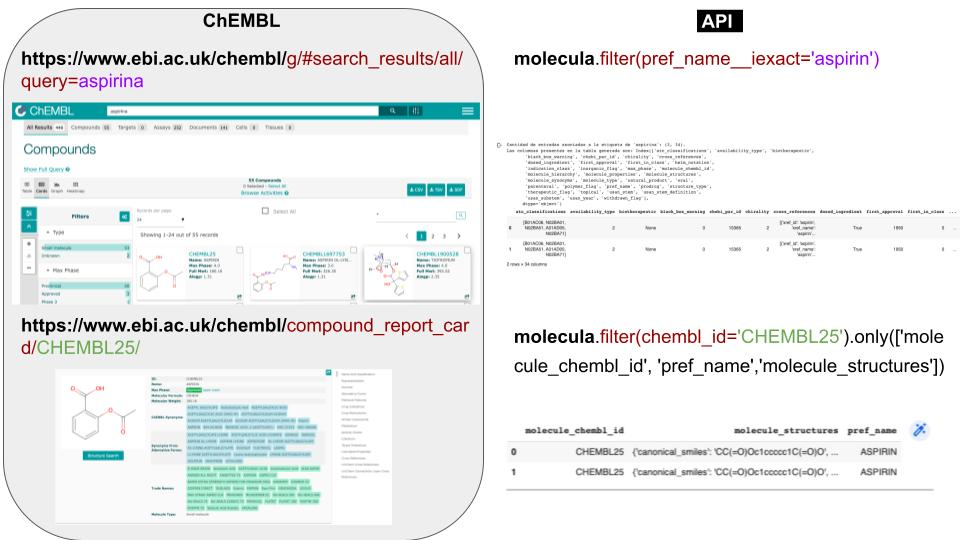

**Figure 1.** Structure of a general search in ChEMBL.

The following code lines show how to make the search of information associated with the word *aspirin* in ChEMBL using the "new_client" API.

In [ ]:
molecule = new_client.molecule #Establish the module to be used (associated with the type of information that is compiled)
mol = molecule.filter(pref_name__iexact='aspirin') #Filter the information and compile the one related to the word "aspirin"
mol_df= pd.DataFrame.from_records(mol) #Store the information on a table
print(f"Amount of entries associated to the label 'aspirin': {mol_df.shape}.")
print(f"The columns in the generated table are: {mol_df.columns}")
mol_df #Display the table

Amount of entries associated to the label 'aspirin': (2, 36).
The columns in the generated table are: Index(['atc_classifications', 'availability_type', 'biotherapeutic',
       'black_box_warning', 'chebi_par_id', 'chemical_probe', 'chirality',
       'cross_references', 'dosed_ingredient', 'first_approval',
       'first_in_class', 'helm_notation', 'indication_class', 'inorganic_flag',
       'max_phase', 'molecule_chembl_id', 'molecule_hierarchy',
       'molecule_properties', 'molecule_structures', 'molecule_synonyms',
       'molecule_type', 'natural_product', 'oral', 'orphan', 'parenteral',
       'polymer_flag', 'pref_name', 'prodrug', 'structure_type',
       'therapeutic_flag', 'topical', 'usan_stem', 'usan_stem_definition',
       'usan_substem', 'usan_year', 'withdrawn_flag'],
      dtype='object')


,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False
1,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False


If you want to visualize information associated to a specific columm, modify the name
inside the brackets for the name of the column of your interest

In [ ]:
mol_df[['cross_references']]

,cross_references
0,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'..."
1,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'..."


In the previous example, two entries associated with the *aspirin* input are thrown. This can happen due to one of the following reasons:

1. Duplicates in the ChEMBL database: it is possible that there are multiple entries in the ChEMBL database that correspond to the indicated label with slightly different information.  This could be due to the different ways to represent the same molecule or different registries for the different forms or salts of the molecule.
2. Search filters: It is important to check the search filters that are being used in the code. In the example, we are searching that the "pref_name" column (preferred name) is the same to *aspirin* without distinction between upper- and lower-case letters. It is possible that there are multiple entries that meet this criterion.
3. Updated data: the ChEMBL database is constantly updated with new information and registries. We can have differences in the results if updates or changes in the database were made since the last time the search was made.

Below, we review the information in the "ChEMBL ID" column to verify the similarity between the obtained information. Finally, we visualize the molecule associated with those identifiers.

In [ ]:
#Visualize the information in the ChEMBL ID column
mol_df['molecule_chembl_id']

,molecule_chembl_id
0,CHEMBL25
1,CHEMBL25


Aspirin


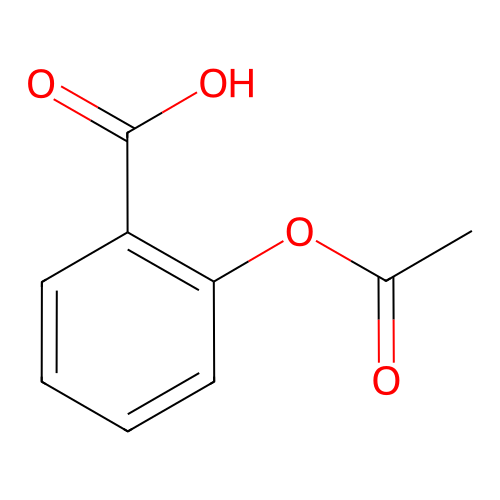

In [ ]:
imagen = new_client.image #Module to visualize images of the molecules
imagen.set_format('svg')
print('\033[1;30;47m' + 'Aspirin' + '\033[0m') #Format to print the name bold and shaded

SVG(imagen.get('CHEMBL25'))


# Endpoints available through the API
---

The ChEMBL API offers a series of modules, through which we can obtain a wide range of information. This information can be filtered using a series of tools and keywords that will be addressed in the following sections.

The code lines below list the different modules that can be used from the API (column labeled as "3"). Each row represents the structure in programming to generate the desired module call in Python (e.g.  `actividad = new_client.activity`)

In [ ]:
# Get the available resources in new_client
resources = [rec for rec in dir(new_client) if not rec.startswith('_')]

# Create a DataFrame with the available resources
available_resources = pd.DataFrame({'1': ['new_client'] * len(resources),
                                     '2': ['.'] * len(resources),
                                     '3': resources,
                                     '4': [f"https://www.ebi.ac.uk/chembl/api/data/{rec}/schema" for rec in resources]
                                    })

# Reorder the Dataframe columnse
available_resources = available_resources[['1', '2', '3', '4']]
# Convert the DataFrame to HTML format
html = available_resources.to_html(render_links=True, escape=False)
# Display the DataFrame in HTML format
HTML(html)

,1,2,3,4
0,new_client,.,activity,https://www.ebi.ac.uk/chembl/api/data/activity/schema
1,new_client,.,activity_supplementary_data_by_activity,https://www.ebi.ac.uk/chembl/api/data/activity_supplementary_data_by_activity/schema
2,new_client,.,assay,https://www.ebi.ac.uk/chembl/api/data/assay/schema
3,new_client,.,assay_class,https://www.ebi.ac.uk/chembl/api/data/assay_class/schema
4,new_client,.,atc_class,https://www.ebi.ac.uk/chembl/api/data/atc_class/schema
5,new_client,.,binding_site,https://www.ebi.ac.uk/chembl/api/data/binding_site/schema
6,new_client,.,biotherapeutic,https://www.ebi.ac.uk/chembl/api/data/biotherapeutic/schema
7,new_client,.,cell_line,https://www.ebi.ac.uk/chembl/api/data/cell_line/schema
8,new_client,.,chembl_id_lookup,https://www.ebi.ac.uk/chembl/api/data/chembl_id_lookup/schema
9,new_client,.,chembl_release,https://www.ebi.ac.uk/chembl/api/data/chembl_release/schema


You can consult the following links for more information:

**https://www.ebi.ac.uk/chembl/api/data/docs**


You can consult the scheme for each of the 35 endpoints by considering the column marked "4". Each of the modules gives particular and focused information.


In [ ]:
def information_of_resource(resource):
    for valor in resource.keys():
        print(valor)

# Assuming that new_client.molecule[0] it´s already defined
information_of_resource(new_client.molecule[0])

atc_classifications
availability_type
biotherapeutic
black_box_warning
chebi_par_id
chemical_probe
chirality
cross_references
dosed_ingredient
first_approval
first_in_class
helm_notation
indication_class
inorganic_flag
max_phase
molecule_chembl_id
molecule_hierarchy
molecule_properties
molecule_structures
molecule_synonyms
molecule_type
natural_product
oral
orphan
parenteral
polymer_flag
pref_name
prodrug
structure_type
therapeutic_flag
topical
usan_stem
usan_stem_definition
usan_substem
usan_year
withdrawn_flag


In [ ]:
#You can access the scheme of information associated with each module without the need to access the previous URL from the following cell
print(json.dumps(new_client.molecule[0], indent=5))

{
     "atc_classifications": [],
     "availability_type": -1,
     "biotherapeutic": null,
     "black_box_warning": 0,
     "chebi_par_id": null,
     "chemical_probe": 0,
     "chirality": -1,
     "cross_references": [],
     "dosed_ingredient": false,
     "first_approval": null,
     "first_in_class": -1,
     "helm_notation": null,
     "indication_class": null,
     "inorganic_flag": -1,
     "max_phase": null,
     "molecule_chembl_id": "CHEMBL6329",
     "molecule_hierarchy": {
          "active_chembl_id": "CHEMBL6329",
          "molecule_chembl_id": "CHEMBL6329",
          "parent_chembl_id": "CHEMBL6329"
     },
     "molecule_properties": {
          "alogp": "2.11",
          "aromatic_rings": 3,
          "cx_logd": "2.69",
          "cx_logp": "3.63",
          "cx_most_apka": "6.48",
          "cx_most_bpka": null,
          "full_molformula": "C17H12ClN3O3",
          "full_mwt": "341.75",
          "hba": 5,
          "hba_lipinski": 6,
          "hbd": 1,
       


# Available resources (keywords)
---
There is a wide range of filters for the "new_client" module that allow us to refine the searches from the keywords, which are:

*   ***iexact***. -	Allows to make a search without differentiating between upper and lower case.
*   ***contains***. -	Search objects that contain a specific value.
 *   ***icontains***. o	Like contains, but without differentiating between upper and lower case.
*   ***in***. -	 Search objects which value is inside a list of values.

---------------------Numeric comparisons---------------------
 * ***gt*** (greater than)
  * ***gte*** (greater than or equal to)
 * ***lt*** (less than)
  * ***lte*** (less than or equal to).

----------------Text string comparisons----------------
 *   ***startswith***. Starts with
  *   ***istartswith***. Starts wiht, without differentiating between upper and lower case.
 *   ***endswith***. Ends with.
  *   ***iendswith***. Ends with, without differentiating between upper and lower case.
*   ***range***.Allows to search objects which value is between a specific range.
*   ***isnull***. Allows to search objects that have a null field (true) or not (no).
*   ***regex***. Allows to make searches using regular expressions  (r'^[A-Za-z]+$', will search objects whose name only consists of letters.).
 *   ***iregex***. Like regex, but without differentiating between upper and lower case.

Above is allowed since this API is built from Django (https://docs.djangoproject.com/en/1.11/ref/models/querysets).




## *Double underscore: __*
It is used to use the keywords to refine the search.

## *Operator: only*
*Only* -	it is a method that limits the results based on a selected field set for a database. This method takes a list of fields (like a single argument) to be included in the results. Using *only* makes an API call quicker due to less information being taken. Note: any specific fields will ignore the nested fields ("logP" is equivalent to "molecular properties").



# *1. Molecule*
---


The *molecule* module usually has bioactivity data. Following there is a definition that provides us the information (column names) within a submodule of interest. The name of these columns can be used as a search filter.




In [ ]:
def information_of_resource(resource):
    for valor in resource.keys():
        print(valor)

# Assuming that new_client.molecule[0] is already defined, with these codelines you can see the columns that can be managed.
information_of_resource(new_client.molecule[0])

atc_classifications
availability_type
biotherapeutic
black_box_warning
chebi_par_id
chemical_probe
chirality
cross_references
dosed_ingredient
first_approval
first_in_class
helm_notation
indication_class
inorganic_flag
max_phase
molecule_chembl_id
molecule_hierarchy
molecule_properties
molecule_structures
molecule_synonyms
molecule_type
natural_product
oral
orphan
parenteral
polymer_flag
pref_name
prodrug
structure_type
therapeutic_flag
topical
usan_stem
usan_stem_definition
usan_substem
usan_year
withdrawn_flag


## 1.1. Search by:

### ***1.1.1. Exact name***
Below a search from the exact name of a common drug (acetaminophen) will be made.

*   Module = ***molecule***
*   Keyword= ***iexact***



In [ ]:
molecule= new_client.molecule
mol = molecule.filter(pref_name__iexact='acetaminophen') #naproxen, aspirin
mol_df= pd.DataFrame.from_records(mol)
print(mol_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   atc_classifications   2 non-null      object
 1   availability_type     2 non-null      int64 
 2   biotherapeutic        0 non-null      object
 3   black_box_warning     2 non-null      int64 
 4   chebi_par_id          2 non-null      int64 
 5   chemical_probe        2 non-null      int64 
 6   chirality             2 non-null      int64 
 7   cross_references      2 non-null      object
 8   dosed_ingredient      2 non-null      bool  
 9   first_approval        2 non-null      int64 
 10  first_in_class        2 non-null      int64 
 11  helm_notation         0 non-null      object
 12  indication_class      2 non-null      object
 13  inorganic_flag        2 non-null      int64 
 14  max_phase             2 non-null      object
 15  molecule_chembl_id    2 non-null      object

In [ ]:
mol_df['molecule_structures']

,molecule_structures
0,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo..."
1,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo..."


#### Molecule visualizations:
*   Module = ***image***

Paracetamol


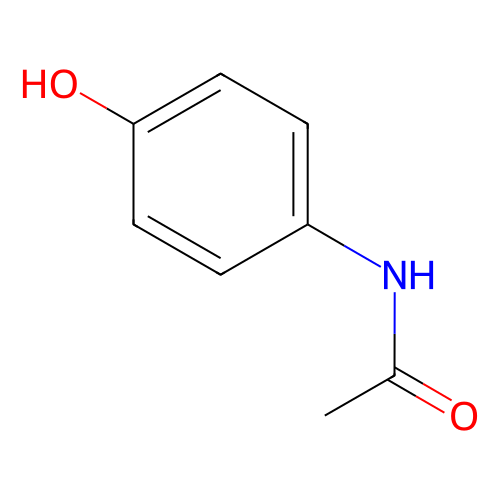

In [ ]:
imagen = new_client.image
imagen.set_format('svg')
print('\033[1;30;47m' + 'Paracetamol' + '\033[0m') #Label text format
SVG(imagen.get('CHEMBL112'))

### ***1.1.2. Synonyms***
In some cases, it is most common to know a drug by a synonym (module: *molecule_synonym*) than by its preferred name in ChEMBL (module: *pref_name*).
In this example we will make the search for the acetaminophen from its most known synonym, **paracetamol**.

*   Module = ***molecule***
*   Keywords= ***molecule_synonym***, ***istartswith***
*   Operator= ***only***



In [ ]:
mol = molecule.filter(molecule_synonyms__molecule_synonym__istartswith='parac').only('molecule_chembl_id', 'pref_name','molecule_structures', 'molecule_synonyms')
                                                                                  #'first_approval','max_phase','oral','parenteral','topical','molecule_properties')
#molecule_synonym is nested in molecule_synonyms
mol_df1= pd.DataFrame.from_records(mol)

#Particular information like the canonic SMILES or the InchiKey are nested in the
#molecule_structures' column and with the following codelines it is possible to retrieve that information.

mol_df1['canonical_smiles'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df1['standard_inchi_key'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['standard_inchi_key'])

mol_df1

,molecule_chembl_id,molecule_structures,molecule_synonyms,pref_name,canonical_smiles,standard_inchi_key
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
2,CHEMBL635,{'canonical_smiles': 'C[C@]12C=CC(=O)C=C1CC[C@...,"[{'molecule_synonym': '3en3hg4wsw', 'syn_type'...",PREDNISONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2C(=O)C[C@@]...,XOFYZVNMUHMLCC-ZPOLXVRWSA-N
3,CHEMBL57053,"{'canonical_smiles': 'Oc1ccc(Cl)cc1', 'molfile...","[{'molecule_synonym': 'Parachlorophenol', 'syn...",PARACHLOROPHENOL,Oc1ccc(Cl)cc1,WXNZTHHGJRFXKQ-UHFFFAOYSA-N
4,CHEMBL1196,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Alcaine', 'syn_type': '...",PROPARACAINE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N,KCLANYCVBBTKTO-UHFFFAOYSA-N
5,CHEMBL398440,"{'canonical_smiles': 'Cc1cc(O)cc(C)c1Cl', 'mol...","[{'molecule_synonym': 'Chloroxylenol', 'syn_ty...",CHLOROXYLENOL,Cc1cc(O)cc(C)c1Cl,OSDLLIBGSJNGJE-UHFFFAOYSA-N
6,CHEMBL1200464,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Ak-taine', 'syn_type': ...",PROPARACAINE HYDROCHLORIDE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N.Cl,BFUUJUGQJUTPAF-UHFFFAOYSA-N
7,CHEMBL1410743,"{'canonical_smiles': 'CC1OC(C)OC(C)O1', 'molfi...","[{'molecule_synonym': '2,4,6-trimethyl-s-triox...",PARALDEHYDE,CC1OC(C)OC(C)O1,SQYNKIJPMDEDEG-UHFFFAOYSA-N


Compare the information obtained with the information displayed through the ChEMBL graphic interface ([click here](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL112/))

### ***1.1.3. ChEMBL ID***
*   Module = ***molecule***
*   Keyword= ***in***
*   Operator= ***only***

ChEMBL ID: stable identifier designed for a direct search of data ([click here](**https**://www.ebi.ac.uk/chembl/)).

This search can be made from one or multiple identifiers. In this example we consider the identifiers for the aspirin (CHEMBL25), acetaminophen (CHEMBL112) and naproxen (CHEMBL154).


In [ ]:
#mol = molecule.filter(chembl_id='CHEMBL25').only(['molecule_chembl_id', 'pref_name','molecule_structures'])
mol = molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL112', 'CHEMBL154',]).only(['molecule_chembl_id', 'pref_name'])
mol_df2= pd.DataFrame.from_records(mol)
mol_df2

,molecule_chembl_id,pref_name
0,CHEMBL25,ASPIRIN
1,CHEMBL25,ASPIRIN
2,CHEMBL112,ACETAMINOPHEN
3,CHEMBL154,NAPROXEN


In [ ]:
print(mol_df2.columns)
print(len(mol_df2['molecule_chembl_id'].unique()))
print(mol_df2['molecule_chembl_id'].unique())

Index(['molecule_chembl_id', 'pref_name'], dtype='object')
3
['CHEMBL25' 'CHEMBL112' 'CHEMBL154']


### ***1.1.4. InchI Key standard***

*   Module = ***molecule***
*   Keyword= ***standard_inchi_key***
*   Operator= ***only***

In [ ]:
mol = molecule.filter(molecule_structures__standard_inchi_key='RZVAJINKPMORJF-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df3= pd.DataFrame.from_records(mol)
mol_df3

,molecule_chembl_id,molecule_structures,pref_name
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN


### ***1.1.5. SMILES***
*   Module = ***molecule***
*   Keyword= ***canonical_smiles***
*   Operator= ***only***

In [ ]:
#CC(=O)Nc1ccc(O)cc1

mol = molecule.filter(molecule_structures__canonical_smiles='CC(=O)Nc1ccc(O)cc1').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df4= pd.DataFrame.from_records(mol)
mol_df4

,molecule_chembl_id,molecule_structures,pref_name
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN


### ***1.1.6. Similarity, considering***

#### ***1.1.6.1. SMILES***
*   Module = ***similarity*** (Metric used: Tanimoto coefficient)
*   Operator= ***only***


In [ ]:
similarity = new_client.similarity
res = similarity.filter(smiles="CC(=O)Nc1ccc(O)cc1", similarity=90).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL112', 'similarity': '100'}


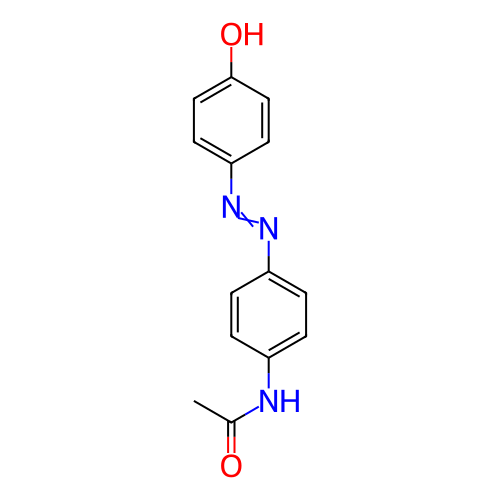

In [ ]:
imagen.set_format('svg')
SVG(image.get('CHEMBL112'))

#### ***1.1.6.2. ChEMBL ID***

*   Module = ***similarity***
*   Operator= ***only***


Molecule ChEMBL ID: CHEMBL112
Preferred Name: ACETAMINOPHEN
Similarity: 76.9230782985687255859375


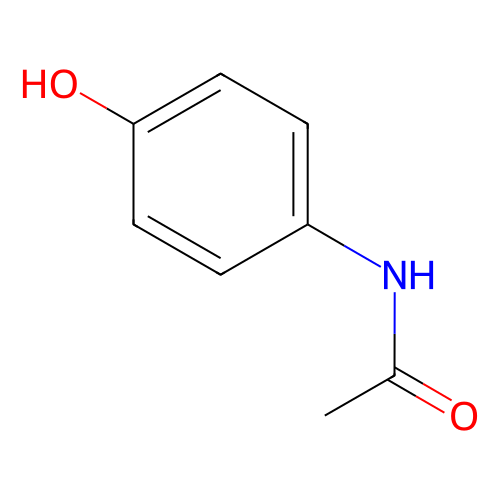



Molecule ChEMBL ID: CHEMBL1483163
Preferred Name: None
Similarity: 73.33333492279052734375


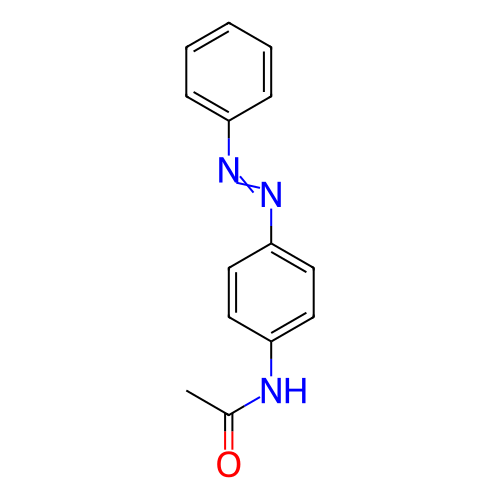



Molecule ChEMBL ID: CHEMBL311003
Preferred Name: None
Similarity: 73.33333492279052734375


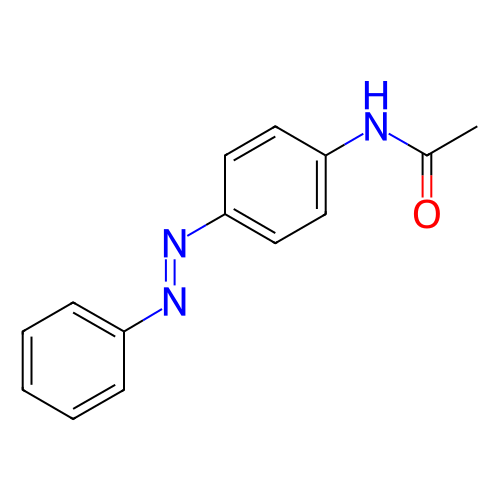



Molecule ChEMBL ID: CHEMBL3228071
Preferred Name: None
Similarity: 63.636362552642822265625


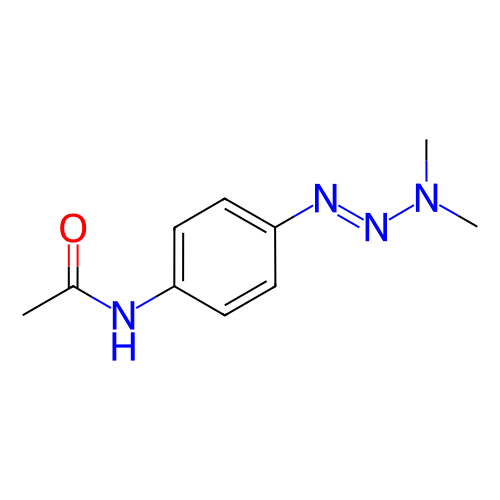



Molecule ChEMBL ID: CHEMBL82053
Preferred Name: None
Similarity: 61.1111104488372802734375


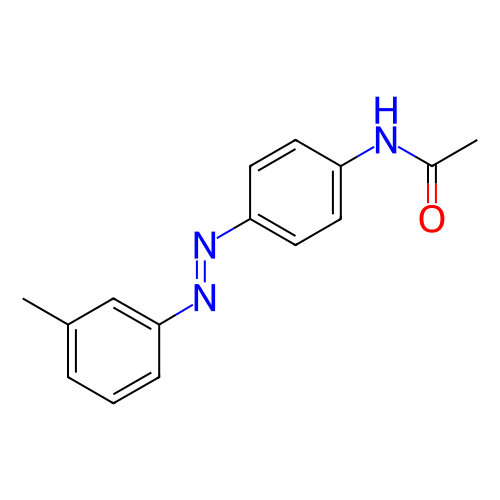



Molecule ChEMBL ID: CHEMBL1590721
Preferred Name: None
Similarity: 60.5263173580169677734375


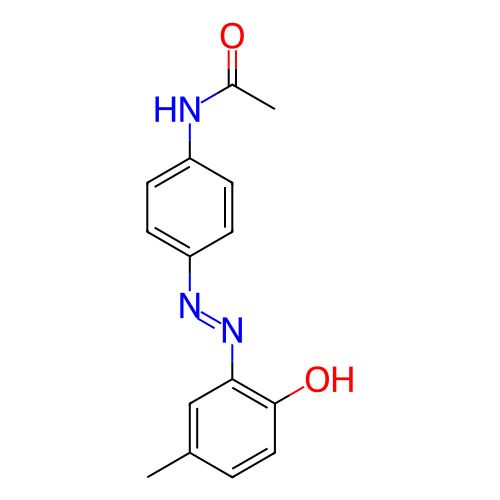

,molecule_chembl_id,pref_name,similarity,svg_image
0,CHEMBL112,ACETAMINOPHEN,76.9230782985687255859375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
1,CHEMBL1483163,None,73.33333492279052734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
2,CHEMBL311003,None,73.33333492279052734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
3,CHEMBL3228071,None,63.636362552642822265625,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
4,CHEMBL82053,None,61.1111104488372802734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...
5,CHEMBL1590721,None,60.5263173580169677734375,<?xml version='1.0' encoding='iso-8859-1'?>\n<...


In [ ]:
res = similarity.filter(chembl_id='CHEMBL1360012',similarity=60).only(['molecule_chembl_id', 'pref_name', 'similarity'])
# Create a list to store data
data = []

# Iterate over the results and store the information in the list
for result in res:
    imagen.set_format('svg')

    molecule_id = result['molecule_chembl_id']
    pref_name = result['pref_name']
    similarity = result['similarity']
    svg_image = imagen.get(molecule_id)
    data.append({'molecule_chembl_id': molecule_id,
                 'pref_name': pref_name,
                 'similarity': similarity,
                 'svg_image': svg_image})

# Create a DataFrame from the list of data
df = pd.DataFrame(data)

# Iterate over the DataFrame and show the SVG images
for index, row in df.iterrows():
    print(f"Molecule ChEMBL ID: {row['molecule_chembl_id']}")
    print(f"Preferred Name: {row['pref_name']}")
    print(f"Similarity: {row['similarity']}")
    display(SVG(row['svg_image']))
    print("\n")

# Display the DataFrame
df

### ***1.1.7.Conectivity***
The following code lines identify molecules that have a conectivity similar to a reference molecular representation (SMILES).
*   Module = ***molecule***
*   Keyword= ***canonical_smiles***, ***connectivity***
*   Operator= ***only***

In [ ]:
res = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df5= pd.DataFrame.from_records(res)
mol_df5['canonical_smiles'] = mol_df5.loc[ mol_df5['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df5
#CN(C)C(=N)N=C(N)N, CC(=O)NC1=CC=C(C=C1)

,molecule_chembl_id,molecule_structures,pref_name,canonical_smiles
0,CHEMBL1431,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N', 'mol...",METFORMIN,CN(C)C(=N)NC(=N)N
1,CHEMBL1431,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N', 'mol...",METFORMIN,CN(C)C(=N)NC(=N)N
2,CHEMBL1703,"{'canonical_smiles': 'CN(C)C(=N)NC(=N)N.Cl', '...",METFORMIN HYDROCHLORIDE,CN(C)C(=N)NC(=N)N.Cl
3,CHEMBL3094198,{'canonical_smiles': 'CN([11CH3])C(=N)NC(=N)N'...,None,CN([11CH3])C(=N)NC(=N)N


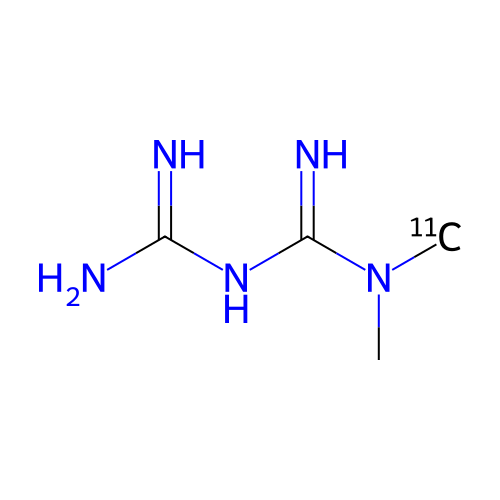

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL3094198'))

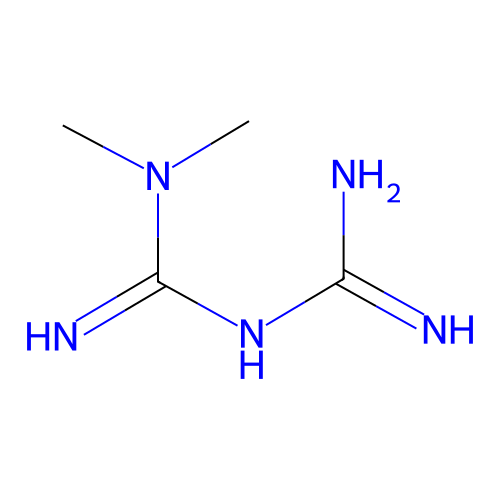

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL1431'))

### ***1.1.8.Substructures***
The following code lines identify molecules that have similar substructures to a molecule of interest:
*   Module = ***substructure***

Number of molecules that contain the substructure for the SMILES (C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2): 2652


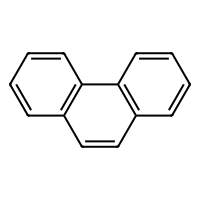

In [ ]:
substructure = new_client.substructure
smiles_list = ["C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2"]  # Phenanthrene

for smiles in smiles_list:
    result = substructure.filter(smiles=smiles)
    print(f"Number of molecules that contain the substructure for the SMILES ({smiles}): {len(result)}")

# Create a list of objects of RDKit molecule from SMILES
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
# Draw the molecules
img = Draw.MolsToGridImage(mol_list, molsPerRow=1)
# Display the image
display(img)

## ***1.2 Filters***

### ***1.2.1. Biotherapeutic compounds***
With the following code lines we will search all the biotherapeutic moleculs.
*   Module = ***molecule***
*   Keywords= ***isnull***

In [ ]:
biotherapeutic = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutic)

23730

### ***1.2.2. MolWt<300***
The filter used below only selects the molecules that have a molecular weight < 300 Da.

*   Module= ***molecule***
*   Keyword= ***mw_freebase***, ***lte***

In [ ]:
small_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)
len(small_molecules)

435477

### ***1.2.3. Nested filters***


It is possible to use multiple nested filters separated by commas:

*   Module = ***molecule***
*   Keywords= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operator= ***only***


In [ ]:
#In the following code lines we search molecules that have in its preffered name the "INE" ending and a MW<300
small_molecules_nib = molecule.filter(molecule_properties__mw_freebase__lte=300,
                                        pref_name__iendswith="ine").only(['molecule_chembl_id', 'pref_name'])
mol_df6= pd.DataFrame.from_records(small_molecules_nib)
mol_df6=mol_df6.sort_values(by='pref_name').reset_index(inplace=False)
print(len(mol_df6))
mol_df6[0:10]
#an,en,in,on,un

1859


,index,molecule_chembl_id,pref_name
0,351,CHEMBL298517,(+)-EPIBATIDINE
1,865,CHEMBL501778,(+)-HIGENAMINE
2,370,CHEMBL60542,(+)-PENTAZOCINE
3,413,CHEMBL76640,(+)-PHYSOSTIGMINE
4,802,CHEMBL257990,(+)-TRANYLCYPROMINE
5,1034,CHEMBL535389,(+/-)-HOMOEPIBATIDINE
6,1793,CHEMBL2414990,(+/-)-NUCIFERINE
7,1792,CHEMBL2414988,(+/-)-ROEMREFIDINE
8,175,CHEMBL440464,(+/-)NICOTINE
9,1715,CHEMBL2236571,(-)-(S)-EDULININE


In [ ]:
print(len(mol_df6))
mol_df6[0:3]

1859


,index,molecule_chembl_id,pref_name
0,351,CHEMBL298517,(+)-EPIBATIDINE
1,865,CHEMBL501778,(+)-HIGENAMINE
2,370,CHEMBL60542,(+)-PENTAZOCINE


### ***1.2.4. Fullilment of  pharmaceutical interest rules (Lipinski y Veber)***
*   Module = ***molecule***
*   Keyword= ***num_ro5_violations***


In [ ]:
without_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
print(f"Molecules that don´t violate the rule of five: {len(without_violations)}")

Molecules that don´t violate the rule of five: 1722396



# *2. Drugs*
---
Unlike compounds, drugs (phase 4, max_phase=4) and the clinical candidates (phase 1, 2  and 3) in ChEMBL usually have curated information and do not necessarily need to have associated bioactivity measurements.
The data in the *drugs* API is added within the drug parentage.

*   Module= ***drug***
*   Operator= ***only***


## 2.1. Obtaining all of the drugs

In [ ]:
drug = new_client.drug
columns=['development_phase','first_approval','molecule_chembl_id','synonyms',  'usan_stem','usan_stem_definition',  'usan_year']
res = drug.only(columns)
drug_df1= pd.DataFrame.from_records(res)
drug_df1

,applicants,atc_code_description,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (JAN, MI, USAN, USP), ...",-azosin,antihypertensives (prazosin type),1968.0
1,None,None,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (JAN, MI, USAN, USP), ...",-azosin,antihypertensives (prazosin type),1968.0
2,None,None,1984.0,CHEMBL3,None,"[Nicotine bitartrate (MI, USAN), Nicotine bita...",None,None,1985.0
3,None,None,1990.0,CHEMBL4,None,"[Ofloxacin (BAN, INN, JAN, MI, USAN, USP), ]",-oxacin,antibacterials (quinolone derivatives),1984.0
4,None,None,1964.0,CHEMBL5,None,"[Nalidixate sodium (USAN), Nalidixic acid (BAN...",nal-,narcotic agonists/antagonists (normorphine type),1962.0
...,...,...,...,...,...,...,...,...,...
15496,None,None,1964.0,CHEMBL5465559,None,[Nystatin],-stat-,enzyme inhibitors: antihyperlipidemics (HMG-Co...,NaN
15497,None,None,NaN,CHEMBL5482975,None,[Cephalosporin],None,None,NaN
15498,None,None,2000.0,CHEMBL5483015,None,[Arsenic trioxide],None,None,2001.0
15499,None,None,NaN,CHEMBL5498461,None,[E133],None,None,NaN


## 2.2. Use of filters
From the previous search we consider applying filters.
*   Module = ***molecule***
*   Keyword= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operator= ***only***

#### ***2.2.1. Year of release, synonym and keywords of the synonyms***

The "**USAN**" (*United States Adopted Names*) is a system to give generic names to drugs in the United States. The USAN names are selected by the "**AMA**" (*American Medical Association*) and other organizations. A "**stem**" in this context refers to a common part of a drug name that indicates its class or category.

In [ ]:
res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin").only(['development_phase',
                                                                                 'first_approval','molecule_chembl_id',
                                                                                 'synonyms','usan_stem',
                                                                                 'usan_stem_definition','usan_year'])
drug_df2= pd.DataFrame.from_records(res)
drug_df2

,applicants,atc_code_description,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
1,None,None,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
2,None,None,1990,CHEMBL707,None,"[Doxazosin mesilate (JAN), Doxazosin mesylate ...",-azosin,antihypertensives (prazosin type),1981


#### ***2.2.2. Maximum clinical phase, classification [ATC](https://go.drugbank.com/atc) and year of approval***
Below we consider the search for approved drugs taking into account the maximun clinical phase 4, the ATC classification for immunosuppressants and the corresponding year of approval.
*   Module = ***molecule***
*   Keyword= ***mw_freebase, lte, pref_name, iendswith***
*   Operator= ***only***


In [ ]:
approved_drugs = molecule.filter(max_phase=4, #Only approved drugs
                                atc_classifications__level4='N03AA', #ATC classification of ANTIEPILEPTICS (Barbiturates and derivates)
                                      #level2: N03, level3: N03A, level4: N03A A
                                #first_approval__gte=2024 #Approved after 2024
                                ).order_by('first_approval').only(['atc_classifications','first_approval',
                                                                   'indication_class','max_phase','pref_name','molecule_type',
                                                                   'molecule_chembl_id'])
drugs_df2= pd.DataFrame.from_records(approved_drugs)
drugs_df2

,atc_classifications,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_type,pref_name
0,[N03AA03],1954.0,Anticonvulsant,4.0,CHEMBL856,Small molecule,PRIMIDONE
1,[N03AA03],1954.0,Anticonvulsant,4.0,CHEMBL856,Small molecule,PRIMIDONE
2,[N03AA30],1982.0,None,4.0,CHEMBL450,Small molecule,METHARBITAL
3,[N03AA02],2022.0,"Anticonvulsant; Sedative-Hypnotic,Sedative-Hyp...",4.0,CHEMBL40,Small molecule,PHENOBARBITAL
4,[N03AA01],NaN,Anticonvulsant; Sedative-Hypnotic,4.0,CHEMBL45029,Small molecule,MEPHOBARBITAL
5,[N03AA04],NaN,None,4.0,CHEMBL3833301,Small molecule,BARBEXACLONE


## ***2.3. Identification of:***


#### ***2.3.1. Molecules considering diseases***
Below we consider the search for drugs that are in clinical phase 3 for a particular disease, in this case we consider lung carcinoma.
*   Module = ***drug***
*   Keyword= ***indication***
*   Operator= ***only***

In [ ]:
pharmaceutical_indication = new_client.drug_indication
lung_carcinomal_indication = pharmaceutical_indication.filter(efo_term__icontains="LUNG CARCINOMA", max_phase_for_ind = 3)
lung_carcinomal_indication_df= pd.DataFrame.from_records(lung_carcinomal_indication)
print(len(lung_carcinomal_indication_df))
lung_carcinomal_indication_df[0:2]

220


,drugind_id,efo_id,efo_term,indication_refs,max_phase_for_ind,mesh_heading,mesh_id,molecule_chembl_id,parent_molecule_chembl_id
0,22696,EFO:0003060,non-small cell lung carcinoma,"[{'ref_id': 'NCT02161991,NCT02646020', 'ref_ty...",3.0,"Carcinoma, Non-Small-Cell Lung",D002289,CHEMBL1471,CHEMBL1471
1,22696,EFO:0003060,non-small cell lung carcinoma,"[{'ref_id': 'NCT02161991,NCT02646020', 'ref_ty...",3.0,"Carcinoma, Non-Small-Cell Lung",D002289,CHEMBL1471,CHEMBL1471


In [ ]:
print(lung_carcinomal_indication_df['mesh_heading'].unique())

['Carcinoma, Non-Small-Cell Lung' 'Carcinoma, Squamous Cell'
 'Lung Neoplasms' 'Small Cell Lung Carcinoma' 'Carcinoma, Large Cell']


In [ ]:
print(lung_carcinomal_indication_df['max_phase_for_ind'].unique())

['3.0']


In [ ]:
lung_carcinomal_phase3 = molecule.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_carcinomal_indication]).only(['molecule_chembl_id','molecule_properties'])
lung_carcinomal_phase3 = pd.DataFrame(lung_carcinomal_phase3)

# Detail the physicochemical properties of interest of the molecules that fufill the previous filters
def information_details(df, column_name_output, column_name_input):
    df[column_name_output] = df[column_name_input].apply(lambda x: x.get(column_name_output) if isinstance(x, dict) else None)
    return df

lung_carcinomal_phase3[0:2]

,molecule_chembl_id,molecule_properties
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log..."
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log..."


In [ ]:
# Detail the information of the physicochemical properties
Detailed_properties = ['mw_freebase', 'alogp', 'aromatic_rings', 'full_molformula', 'hba', 'hbd', 'heavy_atoms',
                          'molecular_species', 'num_lipinski_ro5_violations', 'psa', 'rtb']
for property_name in Detailed_properties:
    lung_carcinomal_phase3 = desglose_informacion(lung_carcinomal_phase3, property_name, 'molecule_properties')
lung_carcinomal_phase3

,molecule_chembl_id,molecule_properties,mw_freebase,alogp,aromatic_rings,full_molformula,hba,hbd,heavy_atoms,molecular_species,num_lipinski_ro5_violations,psa,rtb
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log...",180.16,1.31,1.0,C9H8O4,3.0,1.0,13.0,ACID,0.0,63.60,2.0
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log...",300.44,5.60,0.0,C20H28O2,1.0,1.0,22.0,ACID,1.0,37.30,5.0
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log...",232.28,1.86,2.0,C13H16N2O2,2.0,2.0,17.0,NEUTRAL,0.0,54.12,4.0
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log...",586.69,4.09,3.0,C33H38N4O6,9.0,1.0,43.0,BASE,1.0,114.20,4.0
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log...",421.45,1.85,3.0,C23H23N3O5,8.0,2.0,31.0,BASE,0.0,104.89,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,CHEMBL5095383,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN
177,CHEMBL5314564,"{'alogp': '5.26', 'aromatic_rings': 3, 'cx_log...",584.10,5.26,3.0,C29H35ClFN7O3,9.0,4.0,41.0,BASE,2.0,114.88,10.0
178,CHEMBL5314952,"{'alogp': '4.45', 'aromatic_rings': 4, 'cx_log...",486.58,4.45,4.0,C27H30N6O3,8.0,2.0,36.0,BASE,0.0,93.54,10.0
179,CHEMBL5314987,None,None,None,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN


In [ ]:
#The properties that can be extracted are the following:
properties = lung_carcinomal_phase3['molecule_properties'].iloc[0]
print(json.dumps(properties, indent=4))

{
    "alogp": "1.31",
    "aromatic_rings": 1,
    "cx_logd": "-2.16",
    "cx_logp": "1.24",
    "cx_most_apka": "3.41",
    "cx_most_bpka": null,
    "full_molformula": "C9H8O4",
    "full_mwt": "180.16",
    "hba": 3,
    "hba_lipinski": 4,
    "hbd": 1,
    "hbd_lipinski": 1,
    "heavy_atoms": 13,
    "molecular_species": "ACID",
    "mw_freebase": "180.16",
    "mw_monoisotopic": "180.0423",
    "np_likeness_score": "0.12",
    "num_lipinski_ro5_violations": 0,
    "num_ro5_violations": 0,
    "psa": "63.60",
    "qed_weighted": "0.55",
    "ro3_pass": "N",
    "rtb": 2
}


### ***2.3.2. Action mechanism***
Below we made the search for molecules that interact with a target (insulin receptor) and their respective mechanism of action is identified.
*   Modeule= ***mechanism***
*   Operator= ***only***

In [ ]:
mechanism = new_client.mechanism
res = mechanism.filter(target_chembl_id='CHEMBL1981' #Insulin receptor
                      ).only(['action_type','max_phase','mechanism_comment',
                              'mechanism_of_action','molecule_chembl_id', 'target_chembl_id'])
drug_df3= pd.DataFrame.from_records(res)
drug_df3

,action_type,max_phase,mechanism_comment,mechanism_of_action,molecule_chembl_id,target_chembl_id
0,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201540,CHEMBL1981
1,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201540,CHEMBL1981
2,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201629,CHEMBL1981
3,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201644,CHEMBL1981
4,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201639,CHEMBL1981
5,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201542,CHEMBL1981
6,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201543,CHEMBL1981
7,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
8,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201656,CHEMBL1981
9,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201653,CHEMBL1981


### ***2.3.3. Pharmaceutical alerts***
Following we made the search for compounds that have presented some type of pharmaceutical alert of interest.
*   Module = ***drug***
*   Keyword= ***warning***


In [ ]:
drug_warning = new_client.drug_warning
res = drug_warning.filter(warning_type='Withdrawn', warning_class='carcinogenicity') #carcinogenicity, neurotoxicity
drug_df4= pd.DataFrame.from_records(res)
drug_df4

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
1,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
2,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL44618,CHEMBL44618,carcinogenicity,United States,carcinogenic in mice and rats,2870,"[{'ref_id': '10.1021/cen-v054n016.p007', 'ref_...",Withdrawn,1976
3,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL2104489,CHEMBL2104489,carcinogenicity,Germany; Austria,Animal Carcinogenicity,2876,"[{'ref_id': 'CL12.pdf', 'ref_type': 'WHO', 're...",Withdrawn,1969
4,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL360328,CHEMBL360328,carcinogenicity,United States,Carcinogenicity,2906,[{'ref_id': 'drug-safety-and-availability/fda-...,Withdrawn,2020
5,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL16476,CHEMBL16476,carcinogenicity,United Kingdom,Animal carcinogenicity (rodent),2943,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1965
6,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788386,CHEMBL1788386,carcinogenicity,Oman,Potential risk of carcinogenicity,2953,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
7,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788403,CHEMBL1788403,carcinogenicity,Oman,Potential risk of carcinogenicity,3100,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
8,EFO:0009260,EFO:0011046,non-melanoma skin carcinoma,CHEMBL1863513,CHEMBL1863513,carcinogenicity,European Union; Canada,Increased risk of non-melanoma skin cancer,3121,[{'ref_id': 'recall-alert-rappel-avis/hc-sc/20...,Withdrawn,2020
9,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL53418,CHEMBL53418,carcinogenicity,United States; Canada,May have a carcinogenic potential,3126,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997


#### ***2.3.3.1. Type of alert***
The search can be made through a keyword.
*   Module= ***drug***
*   Keyword= ***icontains***


In [ ]:
res = drug_warning.filter(warning_class__icontains='cardio')#, warning_type='Black Box Warning')
drug_df5= pd.DataFrame.from_records(res)
drug_df5

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
1,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
2,None,EFO:1001482,None,CHEMBL1083993,CHEMBL633,cardiotoxicity,United States,None,98,[{'ref_id': '730039c2-0a32-4775-855d-98b2207e9...,Black Box Warning,NaN
3,None,EFO:1001482,None,CHEMBL501,CHEMBL405,cardiotoxicity,United States,None,109,[{'ref_id': 'f469fb38-0380-4621-9db3-a4f429126...,Black Box Warning,NaN
4,None,EFO:1001482,None,None,None,cardiotoxicity,United States,None,135,[{'ref_id': 'a482eccd-8837-47ea-904d-2f2c294d1...,Black Box Warning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
170,None,EFO:1001482,None,CHEMBL2364649,CHEMBL2364649,cardiotoxicity,United States,None,3746,[{'ref_id': 'e97a5872-eabf-463b-8f4c-5b5aed9c7...,Black Box Warning,NaN
171,None,EFO:1001482,None,CHEMBL4802239,CHEMBL4650319,cardiotoxicity,United States,None,3784,[{'ref_id': 'f1a91500-a944-4cb8-b4a8-ae278bcf7...,Black Box Warning,NaN
172,None,EFO:1001482,None,CHEMBL295698,CHEMBL295698,cardiotoxicity,United States,None,3806,[],Black Box Warning,NaN
173,None,EFO:1001482,None,CHEMBL4297517,CHEMBL4297517,cardiotoxicity,United States,None,3813,[],Black Box Warning,NaN



# *3. Molecular targets*
---
As the previous cases, the search of a molecular target can be made from different paths.
For the following examples we are going to consider a G9a, a histone lysine methyltransferase involved in important epigenetic modifications.



## 3.1. Search by

### ***3.1.1. Gen name***
*   Module = ***target***
*   Keyword= ***icontains***
*   Operator= ***only***

In [ ]:
molecular_target = new_client.target
gene_name = 'spike'
res = molecular_target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Moesin', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Severe acute respiratory syndrome coronavirus 2', 'pref_name': 'Spike glycoprotein', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Severe acute respiratory syndrome coronavirus', 'pref_name': 'Spike glycoprotein', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Severe acute respiratory syndrome coronavirus 2', 'pref_name': 'Spike glycoprotein/Angiotensin-converting enzyme 2', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'MSN-CD44', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}


### ***3.1.2. Uniprot_id***
The [UniProt](https://www.uniprot.org/) ID for G9a is *Q96KQ7*.
*   Module = ***target***
*   Keyword= ***accession***

In [ ]:
activity = new_client.activity
uniprot_id = 'Q9Z148'
name = 'Epidermal growth factor receptor erbB1'
res = molecular_target.filter(pref_name__iexact=name).only('target_chembl_id')[0]
print(res)
act = activity.filter(target_chembl_id=res['target_chembl_id']).filter(standard_type='IC50')
print(len(act))
#targets_df1= pd.DataFrame.from_records(res)
#targets_df1

{'target_chembl_id': 'CHEMBL203'}
18105


### ***3.1.3. Protein name***
*   Module= ***target***
*   Keyword= ***accession***
*   Operator= ***only***

In [ ]:
protein_name = 'transferase'
res = molecular_target.filter(pref_name__icontains=protein_name).only(['organism','pref_name',
                                                                       'target_chembl_id',
                                                                       'target_type']).order_by(['pref_name','organism'])
targets_df2= pd.DataFrame.from_records(res)
targets_df2

,organism,pref_name,target_chembl_id,target_type
0,Mycobacterium tuberculosis,"1,4-dihydroxy-2-naphthoate octaprenyltransferase",CHEMBL4879548,SINGLE PROTEIN
1,Mycobacterium tuberculosis,"1,4-dihydroxy-2-naphthoate octaprenyltransferase",CHEMBL4879548,SINGLE PROTEIN
2,Mus musculus,1-acylglycerol-3-phosphate O-acyltransferase A...,CHEMBL3259509,SINGLE PROTEIN
3,Homo sapiens,1-acylglycerol-3-phosphate O-acyltransferase A...,CHEMBL3885501,PROTEIN-PROTEIN INTERACTION
4,Homo sapiens,1-acylglycerol-3-phosphate O-acyltransferase a...,CHEMBL3583,SINGLE PROTEIN
...,...,...,...,...
539,Homo sapiens,VHL/Histone-arginine methyltransferase CARM1,CHEMBL5465233,PROTEIN-PROTEIN INTERACTION
540,Mus musculus,VHL-Nicotinamide phosphoribosyltransferase,CHEMBL5482989,PROTEIN-PROTEIN INTERACTION
541,Homo sapiens,VHL/Nicotinamide phosphoribosyltransferase,CHEMBL5465234,PROTEIN-PROTEIN INTERACTION
542,Homo sapiens,VHL/Protein arginine N-methyltransferase 5,CHEMBL4748215,PROTEIN-PROTEIN INTERACTION



# *4. Activities*
---
With the following module it is possible to obtain all the information associated to the reported activity for a compounds or a molecular target.

Below, we will get the reported activities (IC50) associated to a molecular target.

*   Module = ***activity***
*   Keyword= ***_iexact***
*   Operator= ***only***


In [ ]:
activity = new_client.activity
herg = molecular_target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")
len(herg_activities)

16074

You can get all the reported activities for a specific molecular target considering binding (type B) assays.

In [ ]:
res = activity.filter(target_chembl_id='CHEMBL3938', assay_type='B') #,pchembl_value__isnull=False)
print(len(res))
assay_b= pd.DataFrame.from_records(res)
assay_b

959


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Active,1650747,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
1,None,Not Active,1650747,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
2,None,Not Active,1650748,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
3,None,Not Active,1650749,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
4,None,None,1650750,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,uM,UO_0000065,None,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,None,% Of Control,25791089,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5480251,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,90.0
956,None,% Of Inhibition,25791605,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5480672,Selectivity interaction (ActivX KiNativ screen...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of inhibition,%,UO_0000187,None,63.0
957,None,% Of Control,25791606,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5480921,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,33.0
958,None,% Of Inhibition,25792345,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5482629,Selectivity interaction (LanthaScreen Eu Kinas...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of inhibition,%,UO_0000187,None,-24.886



# *5. Assays*
---
Next, we will make a search of inhibition assays related to ADMET (type A), measured in specific organisms.

*   Module = ***assay***
*   Keyword= ***icontains***
*   Operador= ***only***

A: ADME assay

B: Binding assay

C: Cellular assay

D: Dose-response assay

F: Functional assay

L: Radioactive ligand assay

M: Metabolic assay

T: Toxicity assay

U: Unclassified assay

In [ ]:
assay = new_client.assay
res = assay.filter(description__icontains='inhibit', assay_type='A',
                    assay_organism='Rattus norvegicus').only(['assay_chembl_id','assay_organism','description'])
assay_df1= pd.DataFrame.from_records(res)
assay_df1

,assay_chembl_id,assay_organism,description
0,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
1,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
2,CHEMBL615148,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 16-...
3,CHEMBL615199,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 2-a...
4,CHEMBL883800,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
...,...,...,...
645,CHEMBL5342542,Rattus norvegicus,Inhibiton of Sprague-Dawley rat testicular mic...
646,CHEMBL5342551,Rattus norvegicus,In vivo inhibition of testosterone in Sprague-...
647,CHEMBL5342556,Rattus norvegicus,Inhibition of rat testicular CYP17
648,CHEMBL5342557,Rattus norvegicus,Inhibition of Spague-Dawley rat testicular mic...


## 5.1. Toxicity
Now through the *drug_warning* module we are going to find toxicity assays.

*   Module = ***assay***
*   Keyword= ***icontains***
*   Operator= ***only***

In [ ]:
res = assay.filter(description__icontains='kidney').only(['assay_chembl_id',#Search of kidney toxicity
                                                           'assay_organism','description'])
assay_df2= pd.DataFrame.from_records(res)
assay_df2

,assay_chembl_id,assay_organism,description
0,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
1,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
2,CHEMBL615234,None,Percent inhibition against 11-beta-hydroxyster...
3,CHEMBL615699,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
4,CHEMBL615700,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
...,...,...,...
7623,CHEMBL5445510,Homo sapiens,Affinity Phenotypic Cellular interaction: (Pro...
7624,CHEMBL5445636,Homo sapiens,Affinity Phenotypic Cellular interaction: (Pro...
7625,CHEMBL5445643,Homo sapiens,Affinity Phenotypic Cellular interaction: (Pro...
7626,CHEMBL5445649,Homo sapiens,Affinity Phenotypic Cellular interaction: (Pro...



# *6. Tissues*
---


## 6.1. Search by

### ***6.1.1. Uberon id***
You can get a particular tissue using ***Uberon id*** (UBERON is an on ontology of anatomy between species).

For more information, see [link](https://www.ebi.ac.uk/ols/ontologies/uberon#:~:text=Uberon%20is%20an%20integrated%20cross,structure%2C%20function%20and%20developmental%20lineage).

*   Module = ***tissue***


In [ ]:
tissue = new_client.tissue
res = tissue.filter(uberon_id="UBERON:0000177")
assay_df3= pd.DataFrame.from_records(res)
assay_df3

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Pus,CHEMBL3987929,UBERON:0000177
1,None,None,None,Pus,CHEMBL3987929,UBERON:0000177


### ***6.1.2. Name of the tissue***
Next, we obtain the information of the tissues that contain the word "blood" in its name.
*   Keyword= ***istarthwith***


In [ ]:
res = tissue.filter(pref_name__icontains='bra') #Brain
assay_df4= pd.DataFrame.from_records(res)
print(len(assay_df4))
assay_df4[0:3]

40


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
1,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
2,BTO:0000142,TS-0095,EFO:0000302,Brain,CHEMBL3638188,UBERON:0000955


### ***6.1.3. BTO ID***
Obtain tissue by ***BTO ID*** (Brenad tissues ontology).

For more information, see [link](https://www.ebi.ac.uk/ols/ontologies/bto#:~:text=A%20structured%20controlled%20vocabulary%20for,cell%20types%20and%20cell%20cultures).


In [ ]:
res = tissue.filter(bto_id="BTO:0001307") #Stomach
assay_df5= pd.DataFrame.from_records(res)
print(len(assay_df5))
assay_df5[0:3]

2


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945
1,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945


### ***6.1.4. EFO ID***
Obtain tissue by ***EFO id*** (Experimental factors ontology).

For more information, see [link](https://www.ebi.ac.uk/efo/).



In [ ]:
res = tissue.filter(efo_id="EFO:0000967") #Neck
assay_df6= pd.DataFrame.from_records(res)
print(len(assay_df6))
assay_df6[0:3]

2


,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974
1,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974


The tissue identifier`caloha_id` corresponds to the provided by the *Swiss Institute for Bioinformatics CALOHA Ontology*.


# *7. Cells*
---

## 7.1. Search by:

### ***7.1.1. Cellosaurus id***
For more information, visit [link](https://www.cellosaurus.org/)
*   Module= ***cell_line***


In [ ]:
cell_lines = new_client.cell_line
res = cell_lines.filter(cellosaurus_id="CVCL_0417") #Breast metastasis of melanoma cells
assays_df7= pd.DataFrame.from_records(res)
print(len(assays_df7))
assays_df7[0:3]

2


,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213
1,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213


### ***7.1.2. Description***
In this case we will obtain cells described as lymphoma.
*   Keyword= ***icontains***

In [ ]:
res = cell_lines.filter(cell_description__icontains="lymphoma")
assays_df8= pd.DataFrame.from_records(res)
print(len(assays_df8))
assays_df8[0:3]

19


,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
1,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
2,CHEMBL3308006,U-937 (Histiocytic lymphoma cells),379,U-937,Homo sapiens,9606.0,Histiocytic lymphoma cells,CVCL_0007,LCL-1125,CLO_0009465,EFO_0001257



# *8. Utilities*
---
[ChEMBL Chemoinformatic Utils](https://www.ebi.ac.uk/chembl/api/utils/docs) (also known as '**ChEMBL Beaker**') is a set of tools that provide RESTful access to chemoinformatic methods commonly used. Most of these use the *RDKit* library.

Includes
* Standarization of chemical structure tools (e.g., verify, get parent, standardize; see [Bento et al](https://github.com/chembl/ChEMBL_Structure_Pipeline).)
* Calculate physicochemical properties (e.g., MW, number of donor/acceptors of hydrogen bonds, number of rings, number of aromatic rings, etc.)
* Format converters of chemical structures (e.g., mol to SMILES, InChI to InChIKey, etc.)
* Other tools for structural alerts, similarity and visualization of molecules.

For more information: https://chembl.gitbook.io/chembl-interface-documentation/web-services/cheminformatic-utils-web-services

## 8.1. Convert SMILES to CTAB
*   Module = ***utils***


CTAB ("*Connection Table*"): it is a mol or sdf type file. It is a text representation used to describe the molecular structure of a chemical substance.  


In [ ]:
aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
aspirin

'\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2 

## 8.2. Calculate

### ***8.2.1. Maximum common substructure (MCS)***
MCS: the bigger substructure that appears in two or more candidate molecules (**Figure 2**).
Allows us to find the significative and shared portion of the molecular structures.


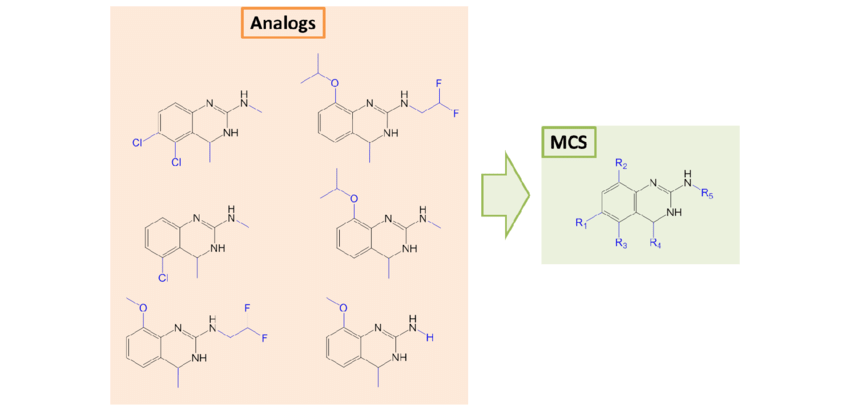

**Figure 2.** Example of MCS

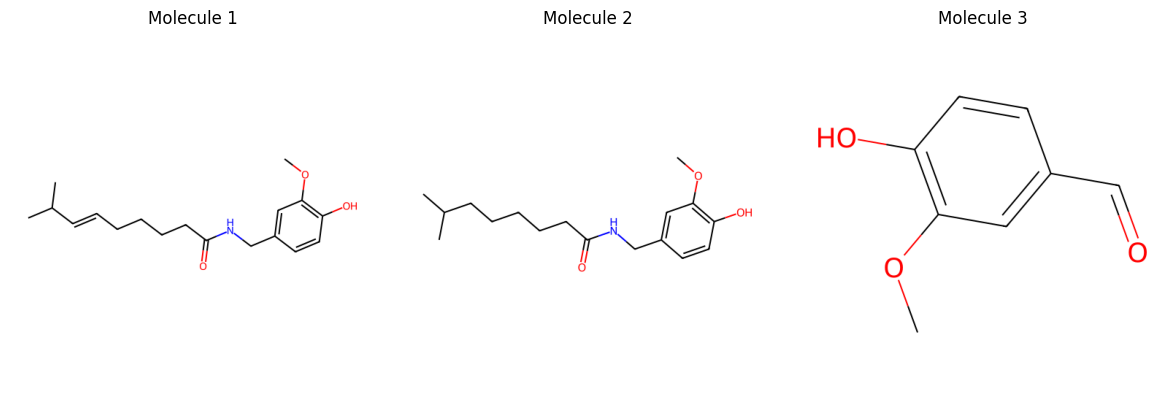

In [ ]:
smiles_list = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]

# Create a list of objects of the RDKit molecule from SMILES
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
# Image size
mol_size = (500, 500)
# Draw molecules
fig, axes = plt.subplots(1, len(mol_list), figsize=(12, 4))

for idx, mol in enumerate(mol_list):
    # Draw molecule in the corresponding subplot
    ax = axes[idx]
    ax.imshow(Draw.MolToImage(mol, size=mol_size))
    ax.axis('off')  # Hide axis
    ax.set_title(f"Molecule {idx+1}")

plt.tight_layout()  # Adjust layout between subplots
plt.show()

[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]


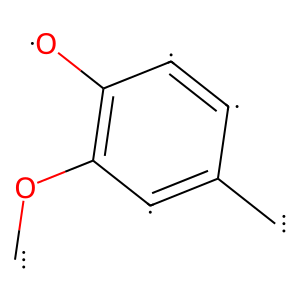

In [ ]:
mols = [utils.smiles2ctab(smile) for smile in smiles_list]
sdf = ''.join(mols)
result = utils.mcs(sdf)
print(result)
mol = Chem.MolFromSmiles(result)
# Draw molecule
Draw.MolToImage(mol)

### ***8.2.2. Molecular descriptors***

In [ ]:
aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
print(aspirin)


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0

In [ ]:
descs = json.loads(utils.chemblDescriptors(aspirin))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

### ***8.2.3. Structural alerts***

In [ ]:
alerts = json.loads(utils.structuralAlerts(aspirin))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


### ***8.2.4. Parent molecule from its SMILES identifier***
Remove salts/solvents.



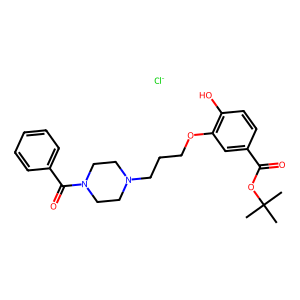

In [ ]:
smiles='CC(C)(C)OC(=O)C1=CC(=C(C=C1)O)OCCCN2CCN(CC2)C(=O)C3=CC=CC=C3.[Cl-]'
molecule= Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [ ]:
molecule_ctab = utils.smiles2ctab(smiles)
par = json.loads(utils.getParent(molecule_ctab))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 32 34  0  0  0  0  0  0  0  0999 V2000\n    2.7412    5.2018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7412    5.1998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2430    6.0668    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.6082    5.6980    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7392    4.1998    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8722    3.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0072    4.2032    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8702    2.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0030    2.2034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0012    1.2034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8662    0.7016    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7332    1.1998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.7350    2.1998    0.0000 C   0  0  0  0  0  0  0  0

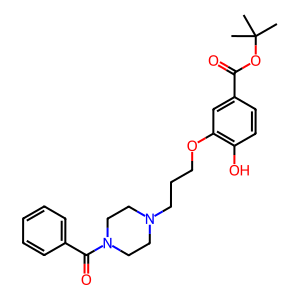

In [ ]:
# Obtain the molblock of the parent molecule
molblock = par[0]['parent_molblock']
# Convert the molblock in a RDKit molecule
mol_parent = Chem.MolFromMolBlock(molblock)
# Draw molecule
Draw.MolToImage(mol_parent)

## 8.3. Standarize molecule

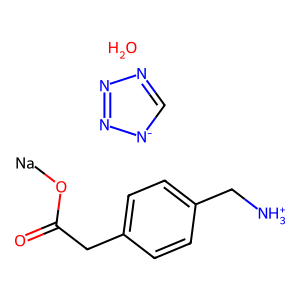

In [ ]:
smiles= '[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O' #'CC(C)(C)OC(=O)C1=CC(=C(C=C1)O)OCCCN2CCN(CC2)C(=O)C3=CC=CC=C3.[Cl-]'
molecule= Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [ ]:
mol = utils.smiles2ctab(smiles)
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n   -1.4275   -2.9831    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0 

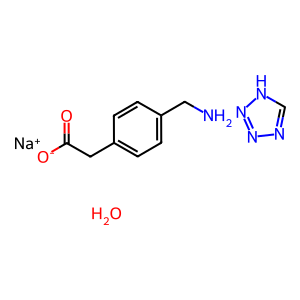

In [ ]:
# Obtain the molblock of the molecule
molblock = st[0]['standard_molblock']
# Convert the molblock in a RDKit molecule
st_mol = Chem.MolFromMolBlock(molblock)
# Draw molecule
Draw.MolToImage(st_mol)

---
# For more information:

* [ChEMBL web server](https://www.ebi.ac.uk/chembl/)
* [ChEMBL data acquisition of TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/talktorials/T001_query_chembl.html)
* [Obtaining ChEMBL information script by Leela S. Dodda](https://gist.github.com/leelasd/746f3c447805fc6ea5aad1071bd77aef)
* [ChEMBL API documentation](https://www.ebi.ac.uk/chembl/api/utils/docs)
* [Examples of the use of the API](https://github.com/chembl/notebooks/blob/main/ChEMBL_API_example_for_webinar.ipynb)
